In [1]:
from IPython import display
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.sparse.linalg
import math

## Please enter 1 in after running the cell below.

Welcome to 1D CPFM simulation testing and validation. 
You have selected the 1D CPFM simulation.

You have the following options:

1 : Pure Diffusion, Qualitative Analysis
2 : Pure Diffusion, Error Convergence Analysis w.r.t. dx
3 : Pure Diffusion, Error Convergence Analysis w.r.t. dt
Please enter the number of the option you want to choose :1

 Pure Diffusion, Qualitative Analysis : starting...

Simulation completed at time 0.10034602076124595 !!!

Simulation completed at time 0.10111495578623635 !!!
Simulation Information : Na = 51 , dx = 0.0196078431372549 , dt = 0.00038446751249519417 , D = 0.1 , t_max = 0.1

FE L1 error = 0.00392388327798506
FE L2 error = 0.0007704691314233355
FE RMS error = 0.005502250158461326

BE L1 error = 0.00392388327798501
BE L2 error = 0.0007337253817563348
BE RMS error = 0.005239847300018145


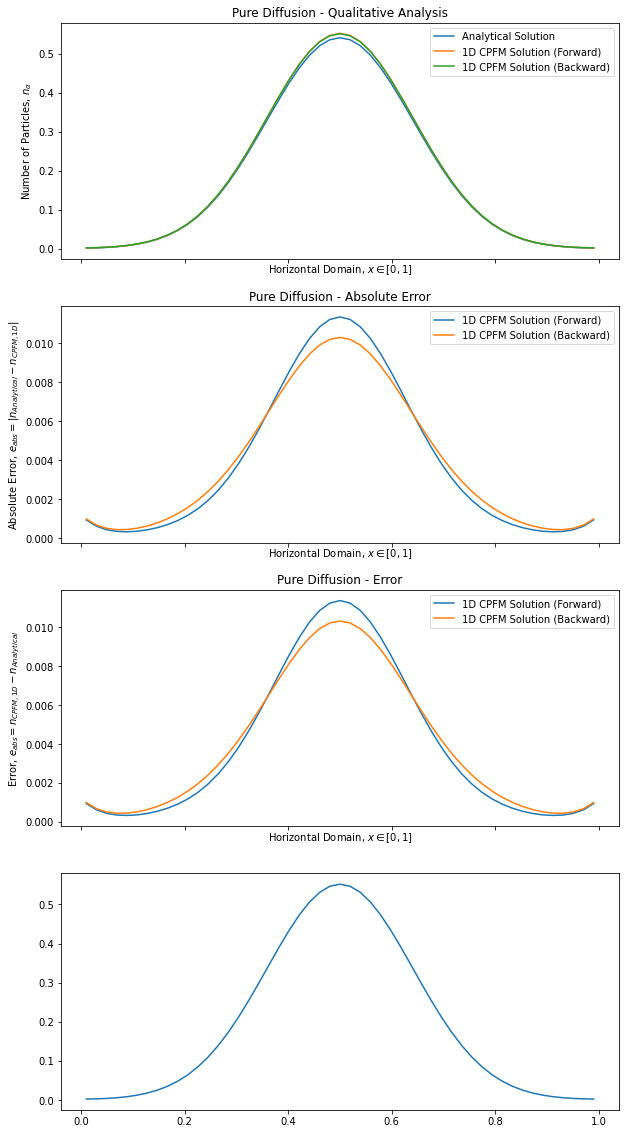

In [2]:
import cpfm_1D_tests_and_validation

**Note :** The error at the edges is associated with the conservation of mass built into the Cellular Phase Field Method. While the analytical solution assumes an infinite domain of diffusion, the CPFM simulation requires that no particles of any species $\alpha$ leaves the computational domain, therefore haviing an $n_\alpha$ buildup at the domain edges relative to the analytical solution.

<br>

**Note :** The absolute error peaks in the middle, and this is associated with the forward Euler temporal discretization. The FE scheme, as expected, results in "too little" diffusion, i.e. larger amplitude and smaller width. 

<br>

<br>

We can explore some implicit and mixed schemes like backward/implicit Euler and the Theta Method where $\theta = 1/2$ gives the improved Euler method.

Our time-stepping scheme is basically related to discretizing $$ \frac{d}{dt} n_\alpha(x, t) = - \frac{1}{a} \left( J_\alpha(x_{A, i+1}) - J_\alpha(x_{A, i}) \right) $$
This can simply be done if we can get the RHS expression into matrix notation:

$$ J_\alpha(x_{A, i+1}) \equiv {\bf{J_1}} = (J_{A, 1}, J_{A, 2}, ... , J_{A, N_a-1}, J_{A, Na})^T $$

$$ J_\alpha(x_{A, i}) \equiv {\bf{J_0}} = (J_{A, 0}, J_{A, 1}, ... , J_{A, N_a-2}, J_{A, Na-1}) $$

Then $\bf{J_1}, \bf{J_0} \in \mathbb{R}^{N_a}$, and $ - \frac{1}{a} \left( J_\alpha(x_{A, i+1}) - J_\alpha(x_{A, i}) \right) \equiv - \frac{1}{a} \left( \bf{J_1} - \bf{J_0} \right) =: - \frac{1}{a} \bf{J_{diff}} $ is simply an $N_a$ dimensional vector, or alternatively we can define a diagonal matrix $\bf{A} \in \mathbb{R}^{N_a \times N_a}$ that has the entries of $ - \frac{1}{a} \bf{J_{diff}} $ on its diagonals. 

We can thus write 

$$ \frac{d}{dt} n_\alpha(x, t) = \bf A $$

<br>

**Forward Euler**

$$ \frac{d}{dt} n_\alpha(x, t) \approx \frac{1}{\Delta t} ( n_\alpha^{k+1} -  n_\alpha^{k} ) = \dot{n_\alpha}^k$$

<br>

**Backward Euler**

$$ \frac{d}{dt} n_\alpha(x, t) \approx \frac{1}{\Delta t} ( n_\alpha^{k+1} -  n_\alpha^{k} ) = \dot{n_\alpha}^{k+1} $$

or 

$$ \frac{d}{dt} n_\alpha(x, t) \approx \frac{1}{\Delta t} ( n_\alpha^{k} -  n_\alpha^{k-1} ) = \dot{n_\alpha}^{k} $$

<br>

**Crank-Nicolson**

$$ \frac{d}{dt} n_\alpha(x, t) \approx \frac{1}{\Delta t} ( n_\alpha^{k+1} -  n_\alpha^{k} ) = \frac{1}{2} ( \dot{n_\alpha}^{k+1} + \dot{n_\alpha}^{k} ) $$

or

$$ \frac{d}{dt} n_\alpha(x, t) \approx \frac{1}{\Delta t} ( n_\alpha^{k} -  n_\alpha^{k-1} ) = \frac{1}{2} ( \dot{n_\alpha}^{k} + \dot{n_\alpha}^{k-1} ) $$


<br>

**Theta Method**

$$ \frac{d}{dt} n_\alpha(x, t) \approx \frac{1}{\Delta t} ( n_\alpha^{k+1} -  n_\alpha^{k} ) = \left( \theta \dot{n_\alpha}^{k+1} + (1 - \theta) \dot{n_\alpha}^{k} \right) $$where $\theta = 1/2$ yields Crank-Nicolson (or improved Euler) and $\theta \in [0, 1]$

or 

$$ \frac{d}{dt} n_\alpha(x, t) \approx \frac{1}{\Delta t} ( n_\alpha^{k} -  n_\alpha^{k-1} ) = \left( \theta \dot{n_\alpha}^{k} + (1 - \theta) \dot{n_\alpha}^{k-1} \right) $$

<br>

All of these time-stepping schemes can (potentially) be implemented. 

In [3]:
abc = np.array([[1,2,3],[4,5,6], [7, 8, 9], [-1, -2, -3]])

print(abc)
print('\n', np.shape(abc))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [-1 -2 -3]]

 (4, 3)


In [4]:
abc[:len(abc)-1, :]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [5]:
abc[:, 1]

array([ 2,  5,  8, -2])

# 